<a href="https://colab.research.google.com/github/SergeyB81/Portfolio/blob/main/bank_ds_test_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown --id 1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-
To: /content/bank-test-case-ds.csv
100% 4.35M/4.35M [00:00<00:00, 40.9MB/s]


In [ ]:
df = pd.read_csv('/content/bank-test-case-ds.csv',sep=';')

In [ ]:
df.head()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.0,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.0,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.0,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.0,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1


Задание Вам предлагается набор данных, содержащий следующие переменные

Переменные, характеризующие кредитную историю клиента:
+ closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым кредитам.
+ closed_creds - количество закрытых кредитов
+ active_cred_sum_overdue - суммарная задолженность по активным кредитам
+ active_cred_sum - сумма всех активных кредитов
* active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам
+ active_cred_max_overdue - максимальная сумма просроченной задолженности по активным кредитам.

Переменные характеризующие клиента:
+ age - возраст
+ gender - пол
+ region - регион
+ month_income - ежемесячный доход

Переменные, характеризующие кредит, по которому нужно сделать прогноз:
+ first_loan - сумма, которую клиент хочет получить в кредит (из заявки)
+ first_days_quant - срок, на которую клиент хочет взять кредит
+ loan_cost_all - одобренная клиенту сумма кредита
+ order_date - дата подачи заявки на получение кредита
+ cost_all - сумма всех выплат по одобренному кредиту
+ order_id - id заявки
+ client_id - id клиента

Целевая переменная:
expert - решение, которое принято по заявке (0 - одобрено, 1 - отклонено)


Необходимо на основе предоставленных данных построить модель для предсказания целевой переменной. Сделать описание проделанных шагов ● Анализ данных ● Фильтрация ● Преобразование переменных ● Моделирование ● Оценка качества модели Обоснование выбранной метрики качества.

In [ ]:
df['expert']

,expert
0,1
1,1
2,1
3,1
4,1
...,...
49996,1
49997,1
49998,1
49999,1


In [ ]:
df['expert'].mean()

0.749265014699706

In [ ]:
df['expert'].value_counts()

,count
expert,
1,37464
0,12537


In [ ]:
df['expert'].value_counts(normalize=True)

,proportion
expert,
1,0.749265
0,0.250735


In [ ]:
df['expert'].value_counts(dropna=True)

,count
expert,
1,37464
0,12537


In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
first_loan,19
closed_creds,0
client_id,0
order_id,0
cost_all,0
order_date,0
month_income,0
first_days_quant,0
loan_cost_all,0
closed_cred_sum,0


In [ ]:
df.isna().mean().sort_values(ascending=False)

,0
first_loan,0.00038
closed_creds,0.00000
client_id,0.00000
order_id,0.00000
cost_all,0.00000
order_date,0.00000
month_income,0.00000
first_days_quant,0.00000
loan_cost_all,0.00000
closed_cred_sum,0.00000


In [ ]:
#функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()

    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]

    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 1)

    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})

    return missing_value_df


#функция для вывода информации о файле
def df_info (df_data):
    print('Количество строк файла:', len(df_data))
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках данных:')
    print()
    display(nan_values(df_data))
    print()
    print('Информация о средних и медианных значениях данных:')
    display(df_data.describe().T)
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())


#просмотр данных столбца: уникальные значения, тип данных, кол-во пропусков
def preprocessing(column):
    #print(column, '-', dict_name[column])
    print('Тип данных', df[column].dtypes)
    print('Количество пропусков',df[column].isna().sum())
    if df[column].dtypes != 'object':
        print('Минимальное значение:',df[column].min(), 'Максимальное значение:', df[column].max() )
    print('Уникальные значения:', '\n', df[column].value_counts())

In [ ]:
df_info(df)

Количество строк файла: 50001

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
region,"[36, 93, 3, 52, 47, 38, 0, 80, 24, 45, 60, 19,...",int64,99
order_id,"[728319, 728321, 728323, 728447, 728421, 72852...",int64,42857
first_days_quant,"[196, 17, 84, 7, 20, 14, 90, 15, 10, 19, 8, 23...",int64,39
loan_cost_all,"[10000, 5000, 5500, 20000, 7000, 3000, 2000, 4...",int64,117
client_id,"[320464, 320466, 320467, 320533, 298598, 32056...",int64,40159
gender,"[0, 1]",int64,2
expert,"[1, 0]",int64,2
active_cred_day_overdue,"[8, 1492, 913, 2883, 0, 1016, 19, 839, 3998, 5...",int64,4719
closed_creds,"[22, 0, 2, 1, 11, 17, 3, 4, 7, 5, 13, 18, 9, 8...",int64,166
age,"[31, 51, 28, 47, 24, 35, 23, 26, 34, 22, 21, 3...",int64,68



Информация о пропусках данных:



,column_name,num_missing,percent_missing
closed_cred_sum,closed_cred_sum,0,0.0
closed_creds,closed_creds,0,0.0
active_cred_sum_overdue,active_cred_sum_overdue,0,0.0
active_cred_sum,active_cred_sum,0,0.0
active_cred_day_overdue,active_cred_day_overdue,0,0.0
active_cred_max_overdue,active_cred_max_overdue,0,0.0
age,age,0,0.0
gender,gender,0,0.0
region,region,0,0.0
first_loan,first_loan,19,0.0



Информация о средних и медианных значениях данных:


,count,mean,std,min,25%,50%,75%,max
closed_cred_sum,50001.0,186577.971519,505740.764741,0.0,5502.00,42874.00,174071.28,44574209.38
closed_creds,50001.0,7.974001,13.933307,0.0,1.00,4.00,9.00,563.00
active_cred_sum_overdue,50001.0,52179.185719,253731.115091,0.0,0.00,5000.00,31579.90,33030999.24
active_cred_sum,50001.0,196420.461737,436521.298484,0.0,14674.00,57030.22,197236.00,22731655.24
active_cred_day_overdue,50001.0,722.563769,1371.656677,0.0,0.00,64.00,923.00,21927.00
active_cred_max_overdue,50001.0,37769.838036,170399.225403,0.0,487.08,6765.66,24499.49,21701655.24
age,50001.0,35.018900,11.235206,18.0,27.00,32.00,41.00,99.00
gender,50001.0,0.462691,0.498611,0.0,0.00,0.00,1.00,1.00
region,50001.0,28.825083,29.726162,0.0,0.00,25.00,52.00,99.00
first_loan,49982.0,7751.682606,5310.782009,2000.0,5000.00,7000.00,10000.00,100000.00



Первые пять строк таблицы:


,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.0,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.0,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.0,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.0,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1


In [ ]:
preprocessing('expert')

Тип данных int64
Количество пропусков 0
Минимальное значение: 0 Максимальное значение: 1
Уникальные значения: 
 expert
1    37464
0    12537
Name: count, dtype: int64


In [ ]:
df[['gender','region']] = df[['gender','region']].astype('str')

In [ ]:
train = df.sample(frac=0.7,random_state=42).copy()

In [ ]:
val = df[~df.index.isin(train.index)].copy()

In [ ]:
len(train) + len(val)

50001

In [ ]:
len(df)

50001

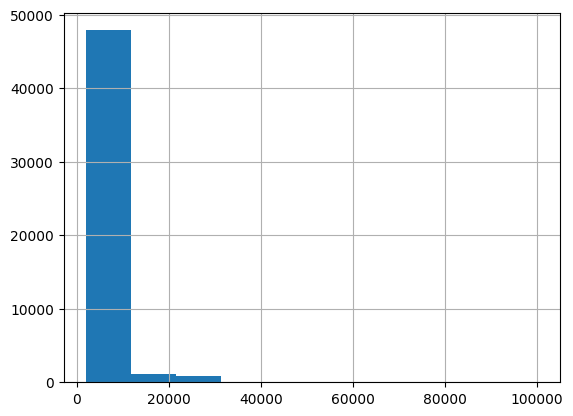

In [ ]:
df['first_loan'].hist();

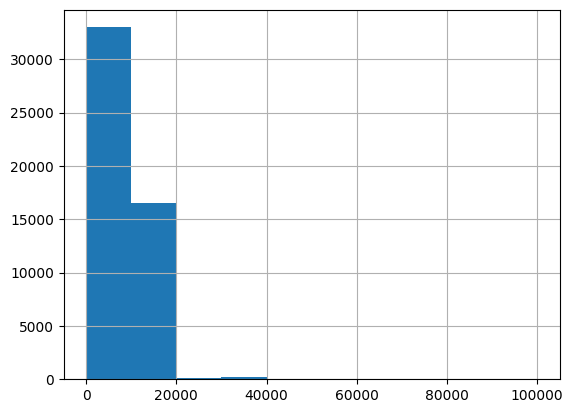

In [ ]:
df['loan_cost_all'].hist();

In [ ]:
df[['first_loan','loan_cost_all']].describe()

,first_loan,loan_cost_all
count,49982.000000,50001.000000
mean,7751.682606,6703.681926
std,5310.782009,4610.529844
min,2000.000000,0.000000
25%,5000.000000,3000.000000
50%,7000.000000,7000.000000
75%,10000.000000,10000.000000
max,100000.000000,100000.000000


In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
df.columns

Index(['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue',
       'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
       'age', 'gender', 'region', 'first_loan', 'loan_cost_all',
       'first_days_quant', 'month_income', 'order_date', 'cost_all',
       'order_id', 'client_id', 'expert'],
      dtype='object')

In [ ]:
df['region'].value_counts()

,count
region,
0,20061
40,4185
36,1921
75,1778
65,1614
...,...
48,19
85,17
43,16


In [ ]:
df['order_date'].agg(['min','max'])

,order_date
min,2017-06-26
max,2017-09-25


In [ ]:
df['age'].value_counts()

,count
age,
30,2390
28,2368
29,2366
27,2289
31,2216
...,...
85,5
83,4
80,4


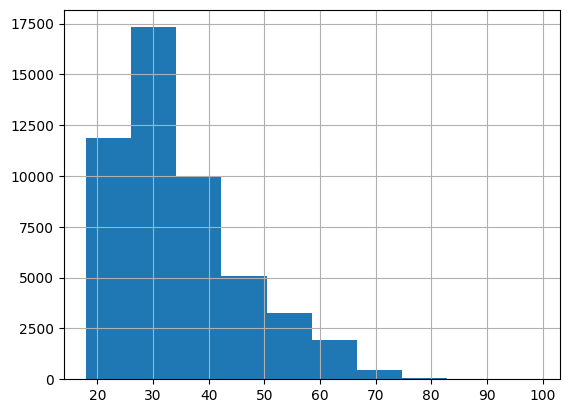

In [ ]:
df['age'].hist();

In [ ]:
df['age'].describe()

,age
count,50001.000000
mean,35.018900
std,11.235206
min,18.000000
25%,27.000000
50%,32.000000
75%,41.000000
max,99.000000


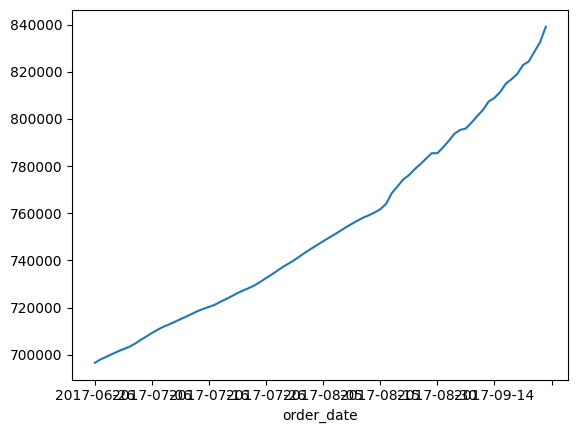

In [ ]:
df.groupby('order_date')['order_id'].mean().plot();

In [ ]:
X_col = ['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue',
       'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
       'age', 'first_loan',
       'first_days_quant', 'month_income',
       'client_id',
       'gender','region']

cat_features = ['gender','region']

y_col = ['expert']

In [ ]:
model = CatBoostClassifier(verbose=100,
                           random_state=42,
                           learning_rate=0.5,
                           early_stopping_rounds=200,
                           eval_metric='AUC',
                           cat_features=cat_features
                           )

In [ ]:
model.fit(train[X_col],train[y_col],eval_set=(val[X_col],val[y_col]))

0:	test: 0.8703715	best: 0.8703715 (0)	total: 165ms	remaining: 2m 44s
100:	test: 0.9441178	best: 0.9441178 (100)	total: 10.2s	remaining: 1m 30s
200:	test: 0.9459992	best: 0.9461400 (167)	total: 19.6s	remaining: 1m 17s
300:	test: 0.9468176	best: 0.9469663 (265)	total: 23.6s	remaining: 54.8s
400:	test: 0.9476001	best: 0.9476765 (387)	total: 27.3s	remaining: 40.8s
500:	test: 0.9484574	best: 0.9486474 (495)	total: 32.7s	remaining: 32.6s
600:	test: 0.9485748	best: 0.9487407 (582)	total: 36.2s	remaining: 24s
700:	test: 0.9486368	best: 0.9487417 (633)	total: 39.6s	remaining: 16.9s
800:	test: 0.9492124	best: 0.9492575 (797)	total: 44.1s	remaining: 11s
900:	test: 0.9494020	best: 0.9494097 (898)	total: 48.2s	remaining: 5.29s
999:	test: 0.9496165	best: 0.9496848 (989)	total: 51.6s	remaining: 0us

bestTest = 0.9496847863
bestIteration = 989

Shrink model to first 990 iterations.


In [ ]:
bestTest = 0.9496847863
bestIteration = 989

In [ ]:
fi = pd.DataFrame({'w':model.feature_importances_,'name':X_col})

In [ ]:
fi.sort_values('w',ascending=False)

,w,name
8,14.691746,first_days_quant
10,12.576234,client_id
9,10.023964,month_income
0,8.394945,closed_cred_sum
3,8.347118,active_cred_sum
6,7.329569,age
5,7.316254,active_cred_max_overdue
2,6.784682,active_cred_sum_overdue
7,6.083783,first_loan
1,6.057225,closed_creds


In [ ]:
! pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 25.9 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train[X_col])


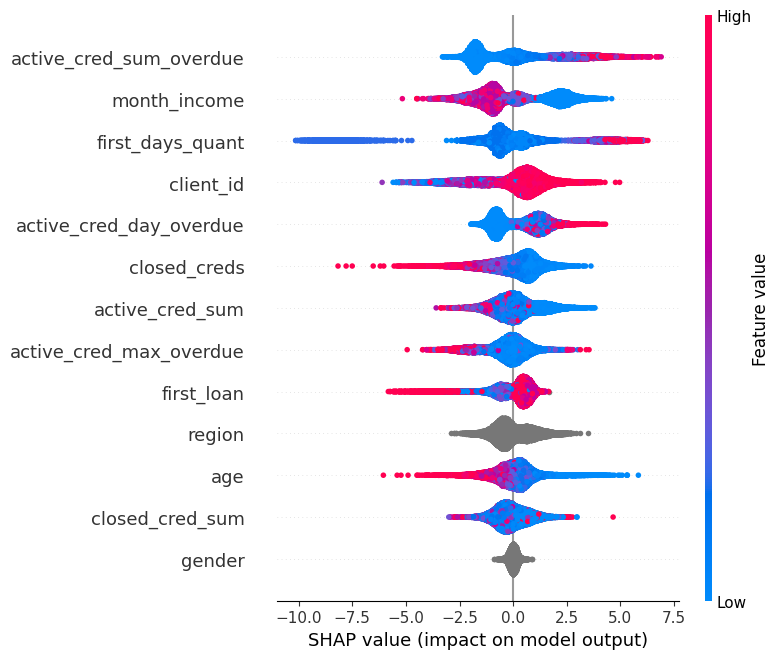

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, train[X_col])


In [ ]:
df['income_cat'] = pd.qcut(df['month_income'],5,duplicates='drop')

In [ ]:
df.groupby('income_cat')['expert'].agg(['count','mean'])

<ipython-input-47-a3c513e64fe5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('income_cat')['expert'].agg(['count','mean'])


,count,mean
income_cat,,
"(-0.001, 20000.0]",22972,0.863225
"(20000.0, 35000.0]",15817,0.684896
"(35000.0, 50000.0]",8401,0.601476
"(50000.0, 550000.0]",2811,0.621843


In [ ]:
df['client_cat'] = pd.qcut(df['client_id'],5,duplicates='drop')

In [ ]:
df.groupby('client_cat')['expert'].agg(['count','mean'])

<ipython-input-49-64805f8449e1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('client_cat')['expert'].agg(['count','mean'])


,count,mean
client_cat,,
"(108.999, 274066.0]",10001,0.455954
"(274066.0, 310588.0]",10000,0.716700
"(310588.0, 322138.0]",10000,0.816000
"(322138.0, 332110.0]",10000,0.869500
"(332110.0, 393528.0]",10000,0.888200


In [ ]:
df['term_cat'] = pd.qcut(df['first_days_quant'],5)

In [ ]:
df.groupby('term_cat')['expert'].agg(['mean','count'])

<ipython-input-51-0f67d03b31cd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('term_cat')['expert'].agg(['mean','count'])


,mean,count
term_cat,,
"(-0.001, 10.0]",0.775424,12606
"(10.0, 14.0]",0.782866,7447
"(14.0, 20.0]",0.654801,19131
"(20.0, 21.0]",0.983274,3647
"(21.0, 336.0]",0.801395,7170


In [ ]:
val['score'] = model.predict_proba(val[X_col])[:,1]

In [ ]:
val

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert,score
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1,0.999996
5,786916.0,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0,0.041321
9,0.0,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,90,0.0,2017-07-23,0.0,728454,123851,1,1.000000
10,0.0,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,15,30000.0,2017-07-23,0.0,728553,123851,1,0.999835
12,0.0,0,0.00,8000.00,0,0.00,24,1,80,7000.0,7000,10,35000.0,2017-07-23,0.0,728476,320544,1,0.989989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,0.0,0,0.00,0.00,0,0.00,20,1,0,7000.0,7000,20,20000.0,2017-08-13,0.0,759492,338248,1,0.999966
49986,0.0,0,0.00,0.00,0,0.00,20,1,0,7000.0,7000,20,20000.0,2017-08-13,0.0,759492,338248,1,0.999966
49995,0.0,0,26758.57,25000.00,371,26758.57,44,1,42,3000.0,1000,23,50000.0,2017-08-13,1545.0,759462,338231,0,0.002401
49996,0.0,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1,0.999997


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
roc_auc_score(val['expert'],val['score'])

0.9496847862832667

In [ ]:
bestTest = 0.9496847863
bestIteration = 989

In [ ]:
fpr, tpr, thr = roc_curve( val['expert'],val['score'])

In [ ]:
roc = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thr':thr})

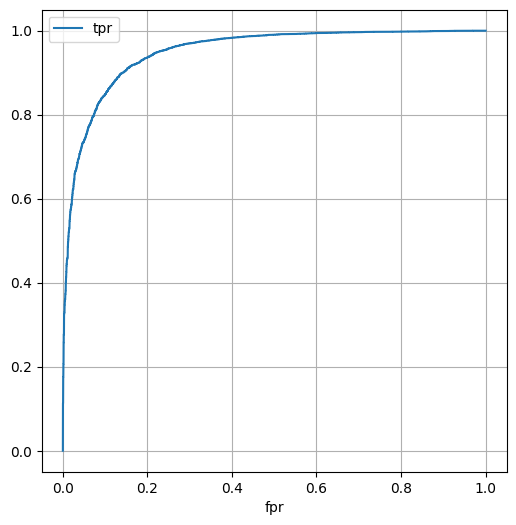

In [ ]:
roc.plot(x='fpr',y='tpr',figsize=(6,6),grid=True);

In [ ]:
roc['tpr-fpr'] = roc['tpr'] - roc['fpr']

In [ ]:
roc

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,fpr,tpr,thr,tpr-fpr
0,0.000000,0.000000,inf,0.000000
1,0.000000,0.000090,1.000000e+00,0.000090
2,0.000000,0.001075,1.000000e+00,0.001075
3,0.000000,0.001254,1.000000e+00,0.001254
4,0.000000,0.002687,1.000000e+00,0.002687
...,...,...,...,...
3170,0.970013,0.999910,1.715398e-05,0.029897
3171,0.970013,1.000000,1.671273e-05,0.029987
3172,0.988787,1.000000,3.191450e-06,0.011213
3173,0.989309,1.000000,3.110079e-06,0.010691


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
roc

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,fpr,tpr,thr,tpr-fpr
0,0.000,0.000,inf,0.000
1,0.000,0.000,1.000,0.000
2,0.000,0.001,1.000,0.001
3,0.000,0.001,1.000,0.001
4,0.000,0.003,1.000,0.003
...,...,...,...,...
3170,0.970,1.000,0.000,0.030
3171,0.970,1.000,0.000,0.030
3172,0.989,1.000,0.000,0.011
3173,0.989,1.000,0.000,0.011


In [ ]:
best_thr = roc.sort_values('tpr-fpr',ascending=False)['thr'].iloc[0]

In [ ]:
best_thr

0.8112574500764482

In [ ]:
val['y_pred'] = (val['score'] >= best_thr)*1

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(val['expert'],val['y_pred']))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      3835
           1       0.95      0.90      0.92     11165

    accuracy                           0.89     15000
   macro avg       0.85      0.88      0.86     15000
weighted avg       0.90      0.89      0.89     15000



In [ ]:
confusion_matrix(val['expert'],val['y_pred'])

array([[ 3314,   521],
       [ 1151, 10014]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(val['expert'],val['y_pred']).ravel()

<Axes: >

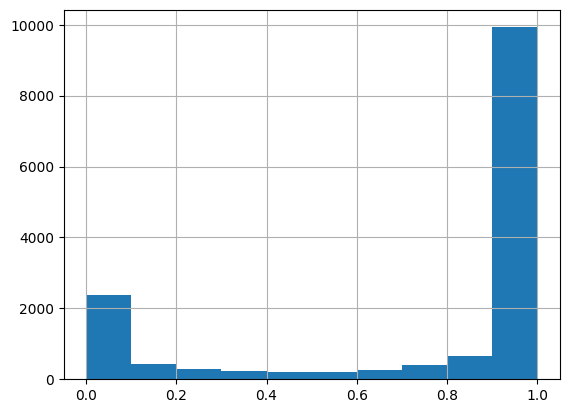

In [ ]:
val['score'].hist()

In [ ]:
fn

1151

In [ ]:
fp

521

In [ ]:
tn, fp, fn, tp = confusion_matrix(val['expert'],val['y_pred']).ravel()

In [ ]:
roc['thr'].unique()

array([           inf, 1.00000000e+00, 1.00000000e+00, ...,
       3.19145042e-06, 3.11007941e-06, 2.26192465e-08])

In [ ]:
thrs = [0] + list(np.sort(val['score'].unique()))

In [ ]:
thr = thrs[123]

In [ ]:
val['pred'] = (val['score'] > thr) * 1

In [ ]:
val['pred'] = (val['score'] > thr) * 1

In [ ]:
tn, fp, fn, tp = confusion_matrix(val['expert'],val['pred']).ravel()

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
res = []
for thr in tqdm(thrs):
  val['pred'] = (val['score'] > thr) * 1
  tn, fp, fn, tp = confusion_matrix(val['expert'],val['pred']).ravel()
  res.append((tn, fp, fn, tp ,thr))


  0%|          | 0/14255 [00:00<?, ?it/s]

In [ ]:
'tn, fp, fn, tp ,thr'.split(',')

['tn', ' fp', ' fn', ' tp ', 'thr']

In [ ]:
cf = pd.DataFrame(res, columns=['tn', 'fp', 'fn', 'tp','thr'])

In [ ]:
cf['profit'] = cf['tn'] - 5 * cf['fn'] - cf['fp']

In [ ]:
cf['profit2'] = cf['tp'] + cf['tn'] - 5 * cf['fn'] - cf['fp']

In [ ]:
cf['profit3'] = -5 * cf['fn'] - cf['fp']

In [ ]:
cf.sort_values('profit',ascending=False)

,tn,fp,fn,tp,thr,profit,profit2,profit3
2759,2586,1249,284,10881,0.219,-83,10798,-2669
2758,2585,1250,284,10881,0.219,-85,10796,-2670
2761,2587,1248,285,10880,0.220,-86,10794,-2673
2760,2586,1249,285,10880,0.219,-88,10792,-2674
2757,2583,1252,284,10881,0.219,-89,10792,-2672
...,...,...,...,...,...,...,...,...
14250,3835,0,11161,4,1.000,-51970,-51966,-55805
14251,3835,0,11162,3,1.000,-51975,-51972,-55810
14252,3835,0,11163,2,1.000,-51980,-51978,-55815
14253,3835,0,11164,1,1.000,-51985,-51984,-55820


In [ ]:
cf.sort_values('profit2',ascending=False)

,tn,fp,fn,tp,thr,profit,profit2,profit3
2465,2356,1479,199,10966,0.132,-118,10848,-2474
2464,2355,1480,199,10966,0.132,-120,10846,-2475
2523,2403,1432,215,10950,0.147,-104,10846,-2507
2460,2352,1483,198,10967,0.131,-121,10846,-2473
2471,2360,1475,201,10964,0.134,-120,10844,-2480
...,...,...,...,...,...,...,...,...
14250,3835,0,11161,4,1.000,-51970,-51966,-55805
14251,3835,0,11162,3,1.000,-51975,-51972,-55810
14252,3835,0,11163,2,1.000,-51980,-51978,-55815
14253,3835,0,11164,1,1.000,-51985,-51984,-55820


In [ ]:
cf.sort_values('profit3',ascending=False)

,tn,fp,fn,tp,thr,profit,profit2,profit3
2026,1973,1862,111,11054,0.058,-444,10610,-2417
2232,2158,1677,148,11017,0.090,-259,10758,-2417
2025,1972,1863,111,11054,0.058,-446,10608,-2418
2231,2157,1678,148,11017,0.089,-261,10756,-2418
2241,2167,1668,150,11015,0.091,-251,10764,-2418
...,...,...,...,...,...,...,...,...
14250,3835,0,11161,4,1.000,-51970,-51966,-55805
14251,3835,0,11162,3,1.000,-51975,-51972,-55810
14252,3835,0,11163,2,1.000,-51980,-51978,-55815
14253,3835,0,11164,1,1.000,-51985,-51984,-55820


<Axes: >

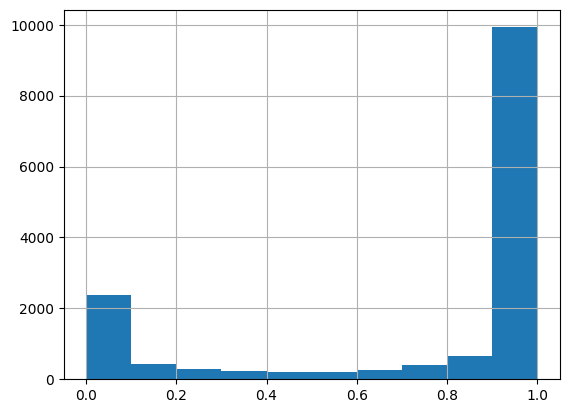

In [ ]:
val['score'].hist()